# Introduction of ...
You'll learn all about the transformation from DICOM to the NIfTI file format and how you can work with them.

This demo is a jupyter notebook, i.e. intended to be run step by step.

Author: Eric Einspänner

First version: 6th of July 2023


Copyright 2023 Clinic of Neuroradiology, Magdeburg, Germany

License: Apache-2.0

## Table of contents
0. [File Formats](#NIfTI-File-Format-Description)
1. [Read DICOM File](#Read-DICOM-File)
2. [Print DICOM Header](#Print-DICOM-Header)
3. [Print NIfTI Header](#Print-NIfTI-Header)

## NIfTI File Format Description
NIfTI is one of the most ubiquitous file formats for storing neuroimaging data.
The images can be stored as a pair of files (hdr/img), or a single file (nii).
The NIfTI format stores spatial transforms so that software can determine the oreintation of the image.

## Read DICOM File


In [32]:
# Make sure figures appears inline and animations works
# Edit this to ""%matplotlib notebook" when using the "classic" jupyter notebook interface
#%matplotlib widget
#%matplotlib ipympl
import numpy
import matplotlib.pyplot as plt

In [4]:
import pydicom
from pydicom.data import get_testdata_file

# load test file
dcm_data = get_testdata_file('MR_small.dcm')

# read a DICOM file
dcm = pydicom.dcmread(dcm_data)

## Print DICOM Header

In [5]:
print(dcm)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 190
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.1.1.4.1.1.20040826185059.5457
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.2
(0002, 0013) Implementation Version Name         SH: 'DCTOOL100'
(0002, 0016) Source Application Entity Title     AE: 'CLUNIE1'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY', 'OTHER']
(0008, 0012) Instance Creation Date              DA: '20040826'
(0008, 0013) Instance Creation Time              TM: '185434'
(0008, 0014) Instance Creator UID                UI: 1.3.6.1.4.1.5962.3
(0008, 0016) SOP Class UID                  

In [21]:
#save dcm to the directory of the current Jupyter Notebook
import os
print(os.getcwd())
dcm.save_as('DICOM_file')

C:\Users\einspaen\Downloads\Nastaran\python-bootcamp-main\notebooks\DICOM


In [3]:
from pathlib import Path # pathlib for easy path handling
import pydicom # pydicom to handle dicom files
import matplotlib.pyplot as plt
import numpy as np
import dicom2nifti # to convert DICOM files to the NIftI format
import nibabel as nib # nibabel to handle nifti files
import dicom2nifti

In [4]:
head_mri_dicom = Path("C:/Users/einspaen/Downloads/Nastaran/DICOM/DICOM/ST000000/SE000001")
dicom2nifti.convert_directory(head_mri_dicom, ".")

In [6]:
#To read a NIfTI file, you can use the load function, which returns a Nifti1Image object containing the data from the NIfTI file.

## Print NIfTI Header

In [7]:
nifti = nib.load('201_t2w_tse.nii.gz')
print(type(nifti))
print(nifti)
nifti.header["qoffset_x"]

<class 'nibabel.nifti1.Nifti1Image'>
<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 27)
affine: 
[[-9.36898887e-01  3.20514254e-02  6.37919828e-02  1.15272324e+02]
 [ 3.03588901e-02  9.27917123e-01 -8.33337128e-01 -9.72956390e+01]
 [ 1.43172191e-02  1.29802674e-01  5.94150448e+00 -8.23735046e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256 256  27   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         0.9375     0.9375     5.9999995  1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code  

array(115.27232, dtype=float32)

In [8]:
print('shape of the nifti image is:',nifti.shape) # get the image shape
print('shape of the nifti image is:',nifti.header.get_data_shape()) # get the image shape in a different way
head_mri = nifti.get_fdata()
print(head_mri.dtype, head_mri.shape)

shape of the nifti image is: (256, 256, 27)
shape of the nifti image is: (256, 256, 27)
float64 (256, 256, 27)


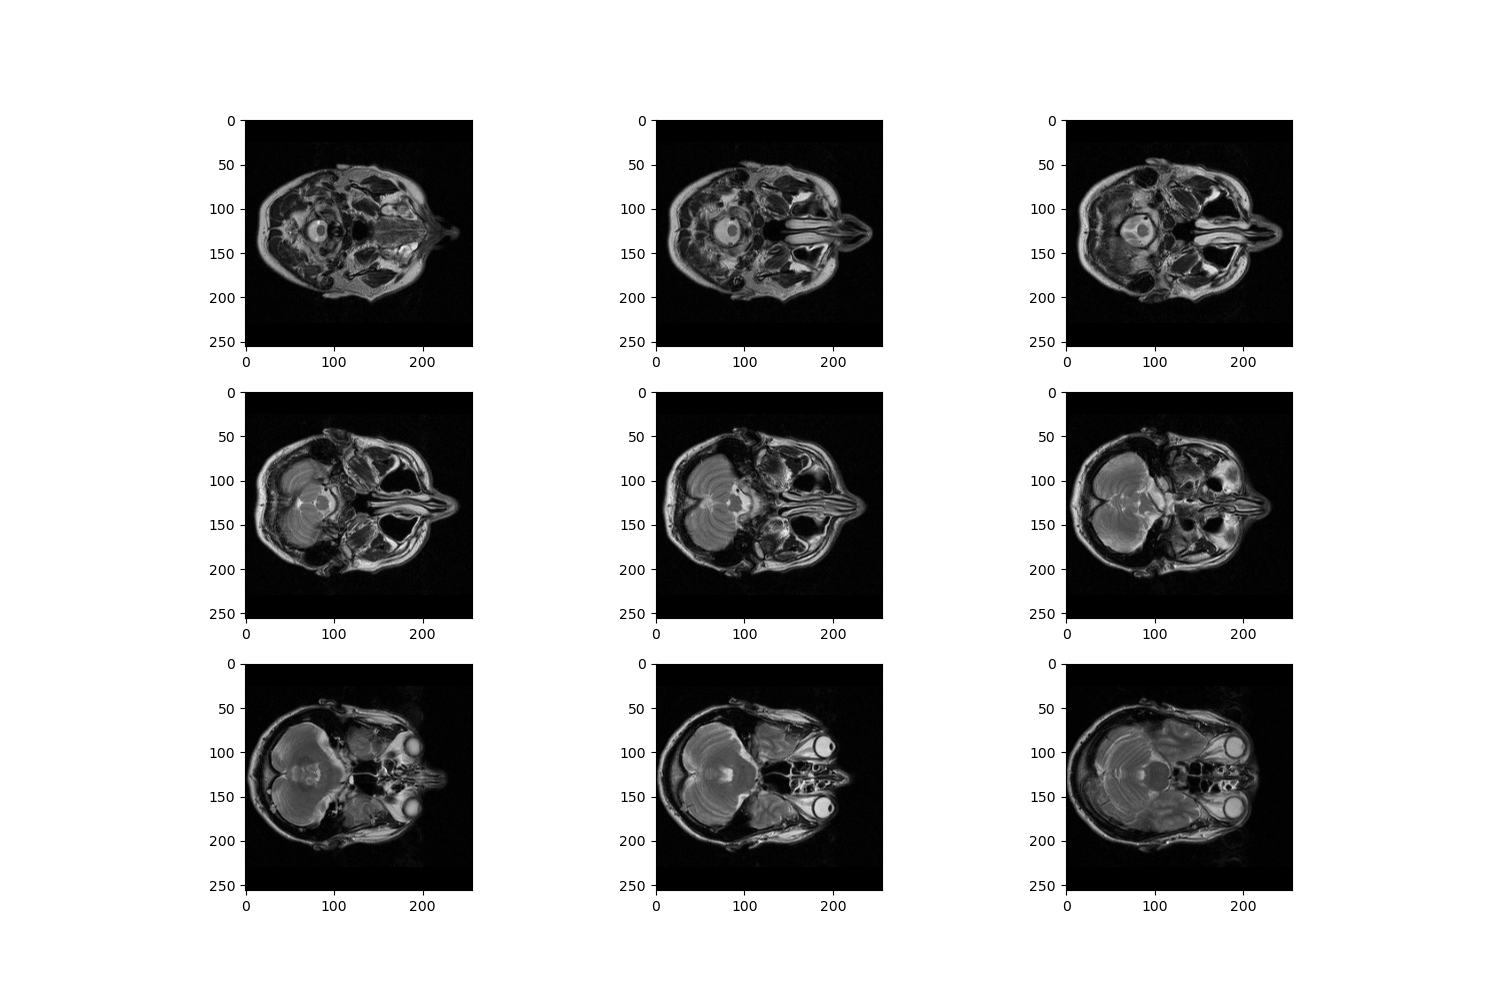

In [35]:
fig, axis = plt.subplots(3, 3, figsize=(15, 10))

slice_counter = 0
for i in range(3):
    for j in range(3):
        axis[i][j].imshow(head_mri[:,:,slice_counter],cmap='gray')
        slice_counter+=1

link :https://www.kaggle.com/code/rinichristy/dicom-to-nifti-conversion-using-nibabel

## Write NIfTI files

Many times, image data obtained as the results of an algorithm or processing step has to be stored in the NIfTI format. This can be easily done using NiBabel. As an example, the 3D image array from above can be used to perform a simple processing step and save it as a new NIfTI file.

In [9]:
# Here apply a very simple threshold and set all image voxels to 0 that have a value smaller than 300
head_mri_processed = head_mri * (head_mri>300)

(-0.5, 255.5, 255.5, -0.5)

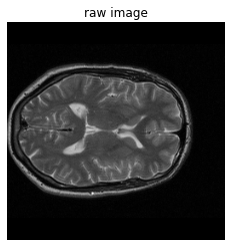

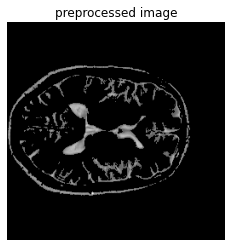

In [11]:
# Now have a look at the results of this processing step (plotting slice number 13) 
plt.imshow(head_mri[:,:,13],cmap="gray") # plot the original image
plt.axis("off")
plt.title('raw image')
plt.figure()
plt.imshow(head_mri_processed[:,:,13],cmap="gray") # plot the processed image
plt.title('preprocessed image')
plt.axis("off")

To save this, first, convert the processed head_mri image array file back to a nifti object by using the numpy array of the processed image and header information about the image geometry (affine matrix) from the original NIftI file.

In [12]:
processed_nifti = nib.Nifti1Image(head_mri_processed, nifti.affine)

Now save the processed image using the save function in NiBabel

In [13]:
nib.save(processed_nifti, '201_t2w_tse_processed.nii.gz')